In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

### Problem 4

In [2]:
"""
Let the carrier frequency be 100 MHz and let the symbol period be 1 microsecond. Consider a transmitted BPSK signal that uses the 25% excess bandwidth Root Raised Cosine pulses (you can use the definition in Wikipedia, where beta=0.25). Using MATLAB or your favorite programming language, plot the RF modulated BPSK signal,

x(t) = sum from n=1 to 8 of [x_n * p(t-nTs)](cos(2*pi*fc*t)

assuming the symbol sequence 1, -1, -1, 1, -1, -1, -1, 1.
"""

fc = 100e6
Ts = 1e-6
beta = 0.25
N = 8
t = np.arange(-2 * N * Ts, 2 * N * Ts, 1 / (2 * fc))
x_n = np.array([1, -1, -1, 1, -1, -1, -1, 1])

# Zero crossing and shift for +-Ts/(4*beta)
zc = len(t) // 2
shift = len(np.arange(0, Ts / (4 * beta), 1 / (2 * fc))) + 1

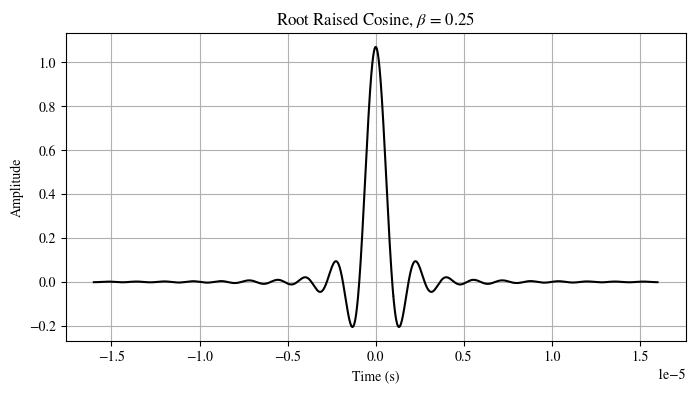

In [3]:
# Root Raised Cosine (Ts * 1/Ts cancels); from Wikipedia
p_rrc = lambda t: (
    np.sin(np.pi * t / Ts * (1 - beta))
    + 4 * beta * t / Ts * np.cos(np.pi * t / Ts * (1 + beta))
) / (np.pi * t / Ts * (1 - (4 * beta * t / Ts) ** 2))
p_rrc_zc = Ts * 1 / Ts * (1 + beta * (4 / np.pi - 1))
p_rrc_shift = (beta / np.sqrt(2)) * (
    (1 + 2 / np.pi) * np.sin(np.pi / (4 * beta))
    + (1 - 2 / np.pi) * np.cos(np.pi / (4 * beta))
)

p = p_rrc(t)
p[zc] = p_rrc_zc
p[zc + shift] = p_rrc_shift
p[zc - shift] = p_rrc_shift

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t, p, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(r"Root Raised Cosine, $\beta$ = 0.25")
plt.grid()
plt.savefig("p4a.png", dpi=300, bbox_inches="tight")
plt.show()

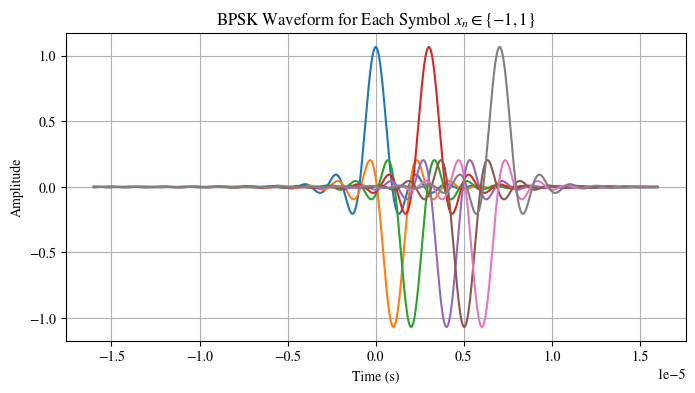

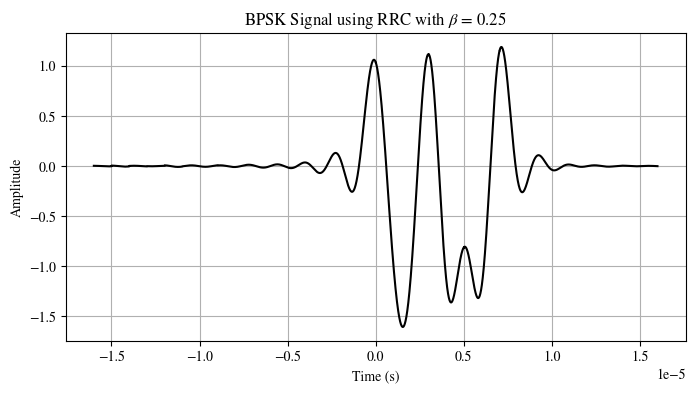

In [4]:
shifted_p = np.zeros(len(t))
interval = len(np.arange(0, Ts, 1 / (2 * fc))) + 1
x_t = np.zeros(len(t))

plt.figure(figsize=(8, 4))
plt.tight_layout()

for i in range(N):
    shifted_p[interval * i : len(p)] = p[0 : len(p) - interval * i]
    x_t += x_n[i] * shifted_p
    plt.plot(t, x_n[i] * shifted_p, linewidth=1.5)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(r"BPSK Waveform for Each Symbol $x_n \in \{-1, 1\}$")
plt.grid()
plt.savefig("p4b.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, x_t, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("BPSK Signal using RRC with $\\beta$ = 0.25")
plt.grid()
plt.savefig("p4c.png", dpi=300, bbox_inches="tight")
plt.show()

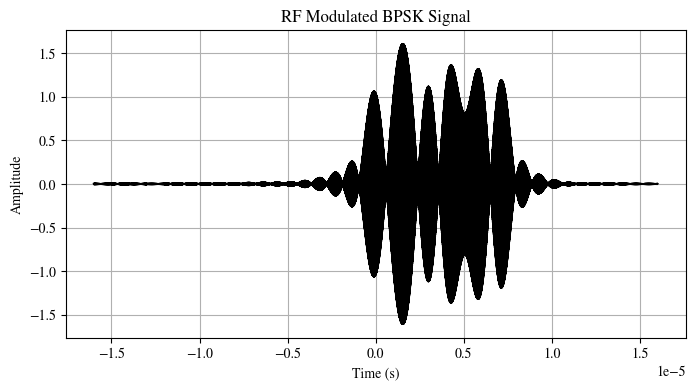

In [5]:
modulated_p4 = x_t * np.cos(2 * np.pi * fc * t)

plt.figure(figsize=(8, 4))
plt.plot(t, modulated_p4, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("RF Modulated BPSK Signal")
plt.grid()
plt.savefig("p4d.png", dpi=300, bbox_inches="tight")
plt.show()

### Problem 5

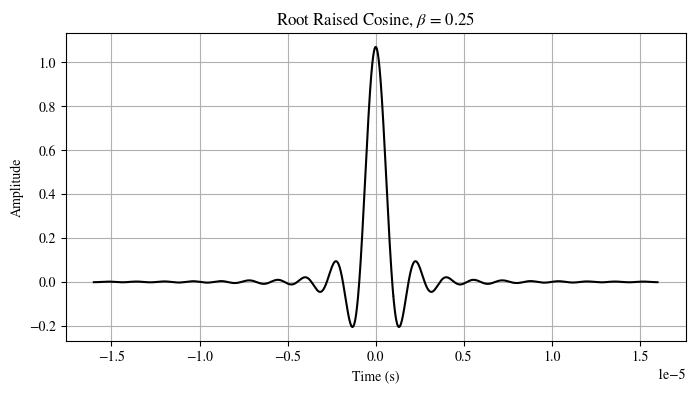

In [6]:
"""
Using the same parameters as in Problem 1, plot the RF modulated QPSK waveform

x(t) = sum from n=1 to 8 of [x_n * p(t-nTs)](cos(2*pi*fc*t) - sum from n=1 to 8 of [x_n * p(t-nTs)](sin(2*pi*fc*t)

Use the same x_n sequence as in Problem 4, and let the quadrature symbols of the signal, y_n, be -1, -1, 1, 1, 1, -1, 1, -1.
"""

y_n = np.array([-1, -1, 1, 1, 1, -1, 1, -1])

plt.figure(figsize=(8, 4))
plt.plot(t, p, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(r"Root Raised Cosine, $\beta$ = 0.25")
plt.grid()
plt.show()

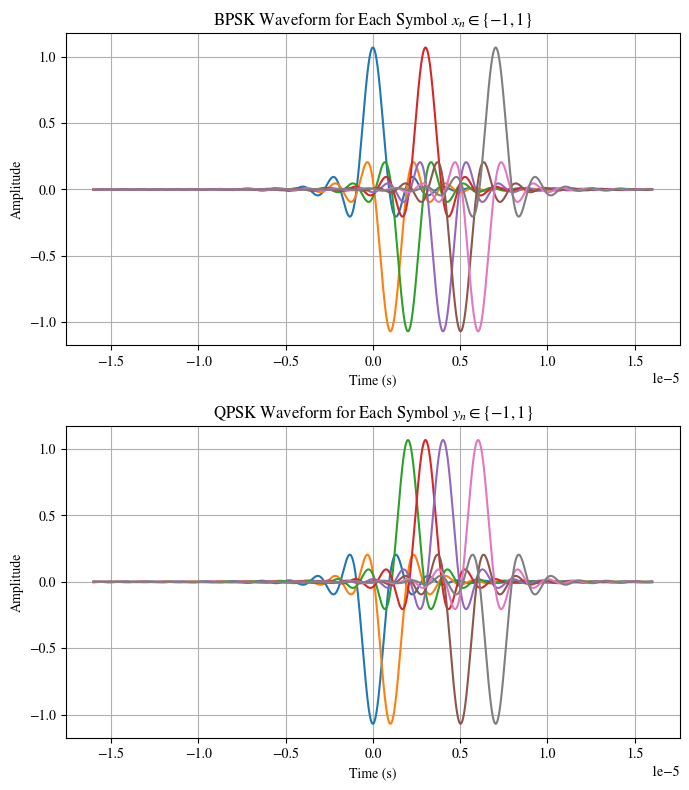

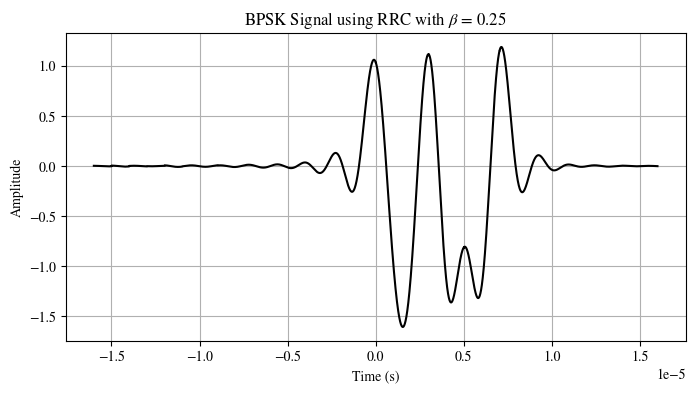

In [7]:
shifted_p = np.zeros(len(t))
interval = len(np.arange(0, Ts, 1 / (2 * fc))) + 1
x_t = np.zeros(len(t))
y_t = np.zeros(len(t))

ax, fig = plt.subplots(2, 1, figsize=(7, 8))

for i in range(N):
    shifted_p[interval * i : len(p)] = p[0 : len(p) - interval * i]
    x_t += x_n[i] * shifted_p
    y_t += y_n[i] * shifted_p
    fig[0].plot(t, x_n[i] * shifted_p, linewidth=1.5)
    fig[1].plot(t, y_n[i] * shifted_p, linewidth=1.5)
    
fig[0].set_xlabel("Time (s)")
fig[0].set_ylabel("Amplitude")
fig[0].set_title(r"BPSK Waveform for Each Symbol $x_n \in \{-1, 1\}$")
fig[0].grid()

fig[1].set_xlabel("Time (s)")
fig[1].set_ylabel("Amplitude")
fig[1].set_title(r"QPSK Waveform for Each Symbol $y_n \in \{-1, 1\}$")
fig[1].grid()

plt.tight_layout()
plt.savefig("p5a.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(t, x_t, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("BPSK Signal using RRC with $\\beta$ = 0.25")
plt.grid()
plt.savefig("p5b.png", dpi=300, bbox_inches="tight")
plt.show()

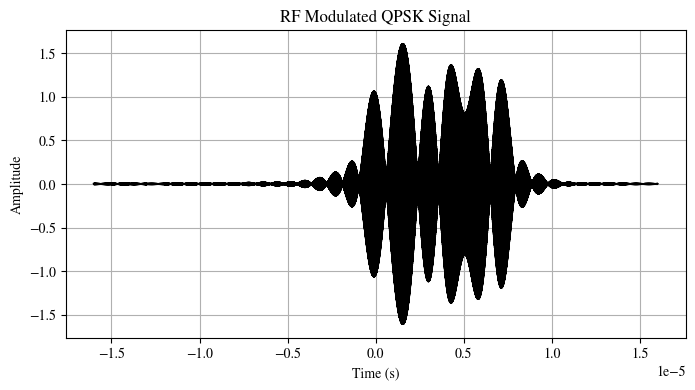

In [58]:
modulated_i = x_t * np.cos(2 * np.pi * fc * t)
modulated_q = y_t * np.sin(2 * np.pi * fc * t)
modulated_p5 = modulated_i - modulated_q

plt.figure(figsize=(8, 4))
plt.plot(t, modulated_p5, "k-", linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("RF Modulated QPSK Signal")
plt.grid()
plt.savefig("p5c.png", dpi=300, bbox_inches="tight")
plt.show()